In [1]:
import numpy as np # importing numpy for numpy arrays
import pandas as pd # importing pandas for pandas dataframe
import matplotlib.pyplot as plt # for plotting visuals
import seaborn as sns # for plotting visuals
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:\\Users\\sadan\\Downloads\\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\\ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head() # displaying first 5 rows 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Attributes related with eating habits are:¶
Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

Attributes related with the physical condition are:
Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

# Data Preprocessing and preparation

In [4]:
df.info()  # getting information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.shape

(2111, 17)

In [6]:
df.isnull().sum() # checking for missing values in each column

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# There are no missing values in the dataset

In [7]:
df.describe() # getting summary statistics 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
df.nunique() # number of unique categories in each column

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [9]:
df['NObeyesdad'].unique() # number of categories in NObeyesdad

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [10]:
df['CAEC'].unique() # number of categories in CAEC

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [11]:
df['CALC'].unique() # number of categories in CALC

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [12]:
df['MTRANS'].unique() # number of categories in MTRANS

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [13]:
# Displaying numerical and categorical variables

numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Variables:")
print(numerical_variables)
print("\n")
print("Categorical Variables:")
print(categorical_variables)

Numerical Variables:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Categorical Variables:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


# Label Encoding 

In [14]:
df.replace({'Gender':{'Male':1,'Female':0},'family_history_with_overweight':{'no':0,'yes':1},
           'FAVC':{'no':0,'yes':1},'CAEC':{'no':0,'Sometimes':1,'Frequently':2,'Always':3},'SMOKE':{'no':0,'yes':1},'SCC':{'no':0,'yes':1},'CALC':{'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3},'MTRANS':{'Public_Transportation':0,'Walking':1,'Automobile':2,'Motorbike':3,'Bike':4},'NObeyesdad':{'Normal_Weight':0,'Overweight_Level_I':1,'Overweight_Level_II':2,'Obesity_Type_I':3,'Insufficient_Weight':4, 'Obesity_Type_II':5,
       'Obesity_Type_III':6}},inplace=True) # converting the categorical variables to numerical labels

In [15]:
pd.set_option('display.max_columns', None) # option to display maximum columns 
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,2


In [16]:
df.shape

(2111, 17)

# Data Visualization

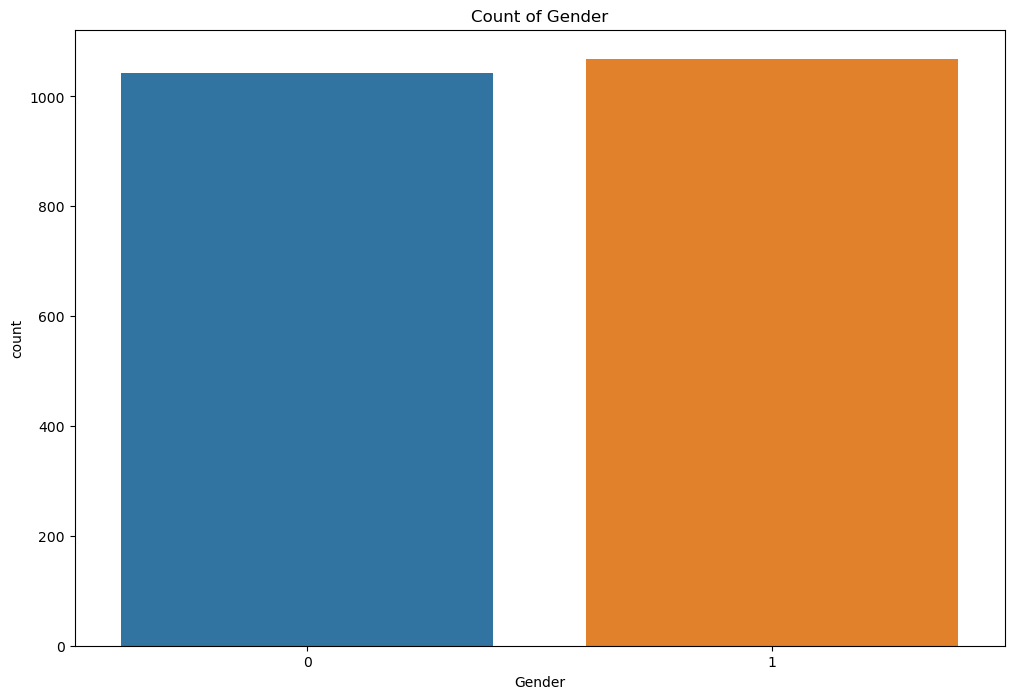

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Count plots
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Gender')
plt.title('Count of Gender')
plt.show()





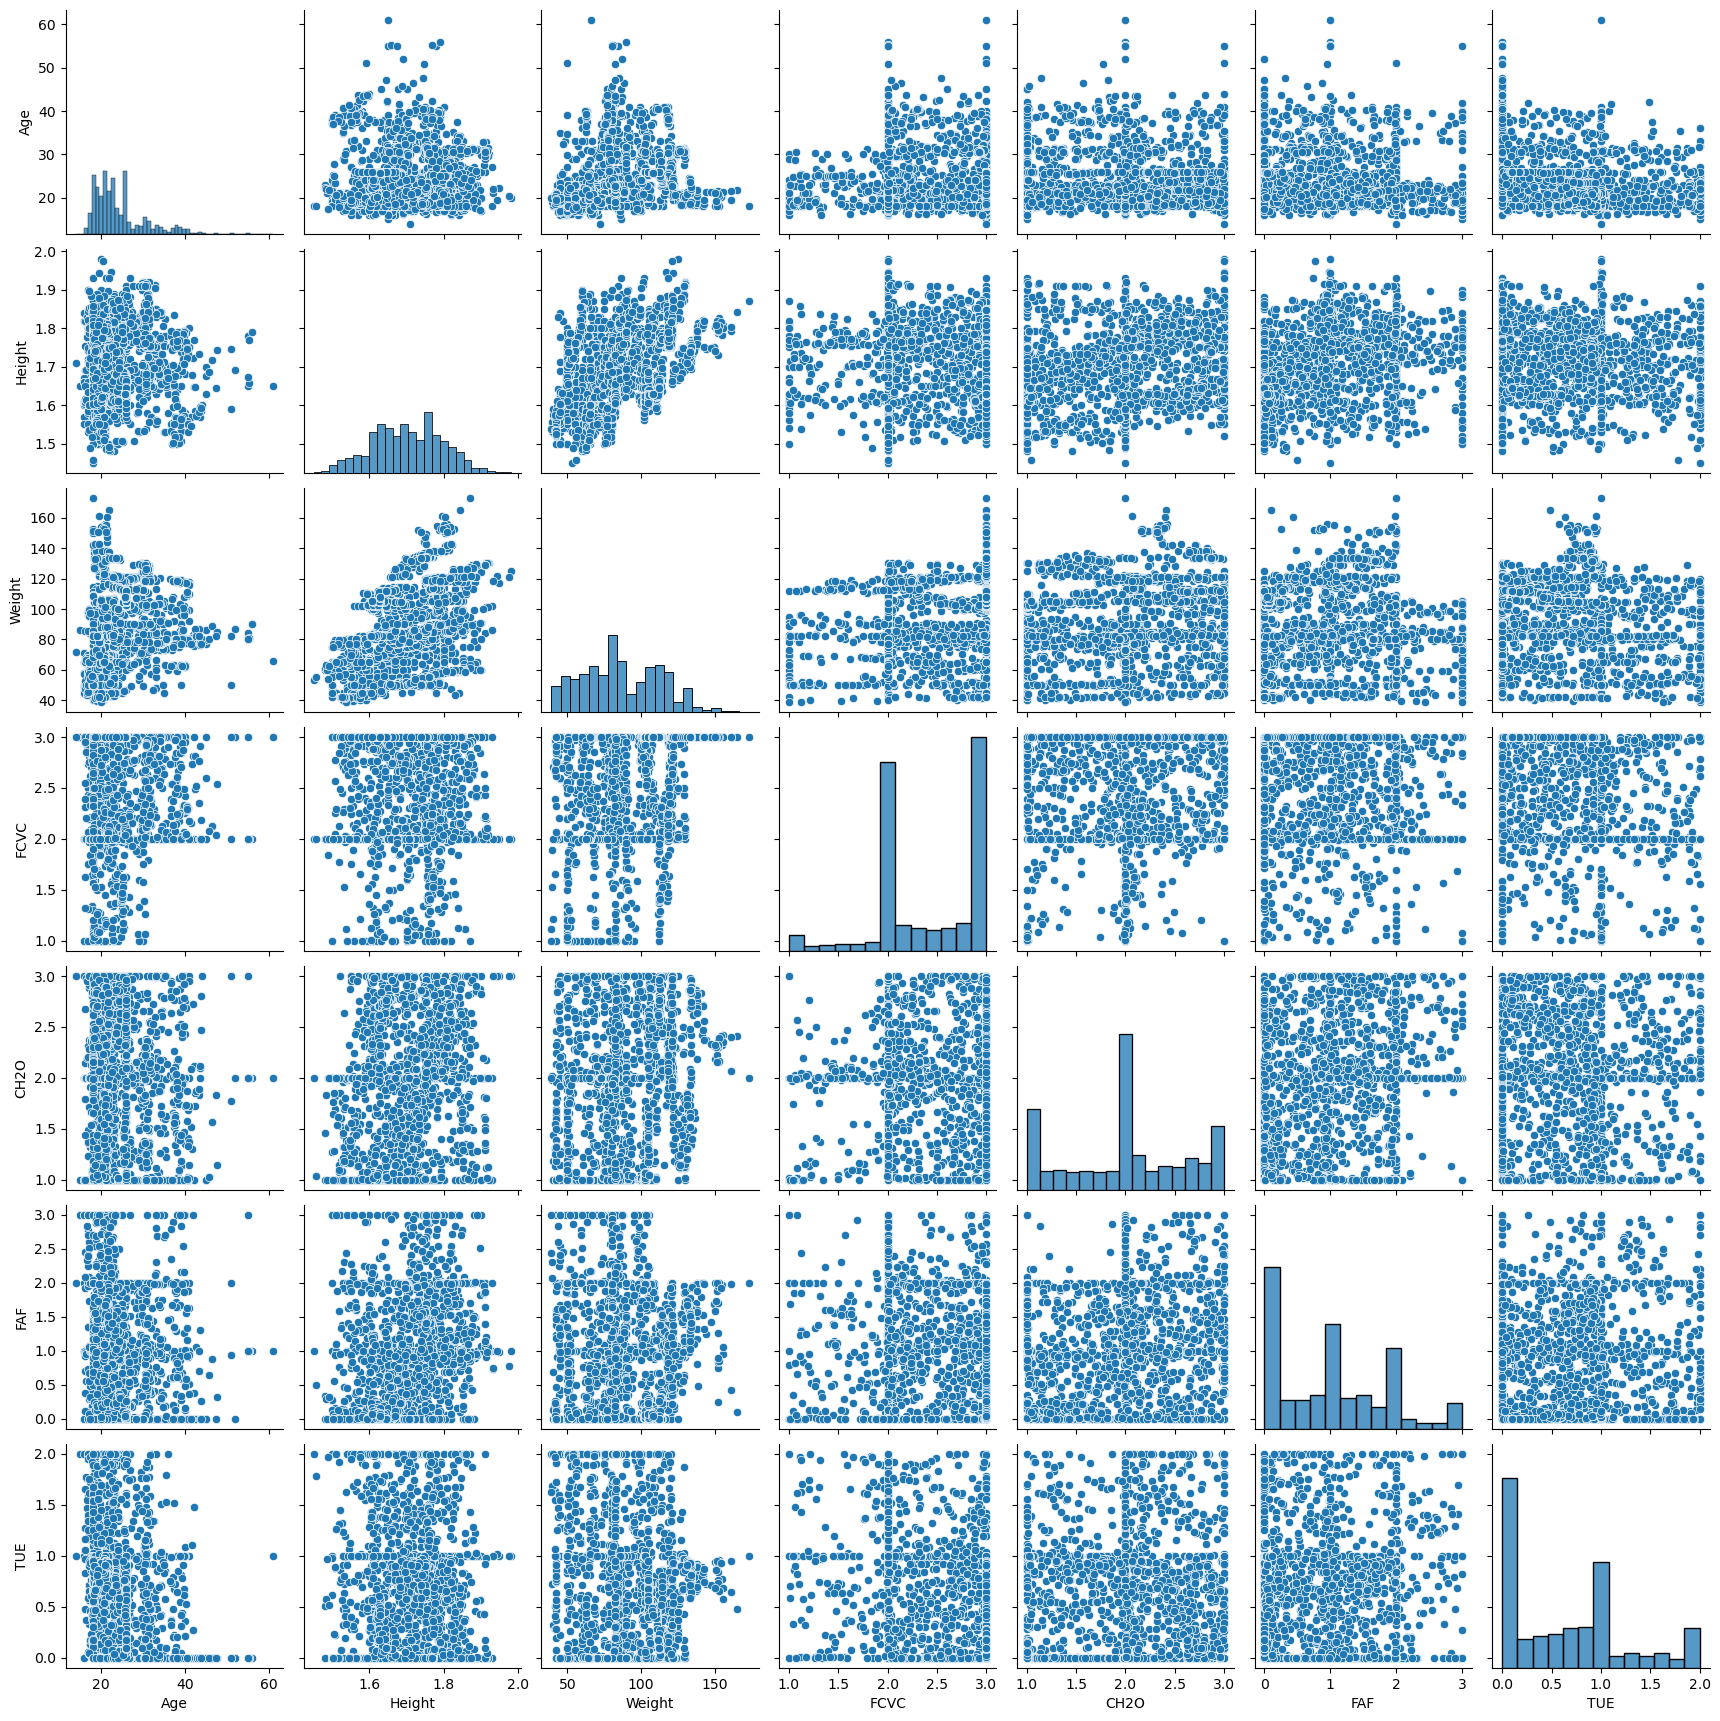

In [18]:
# Pairplot
sns.pairplot(df[['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']])
plt.show()


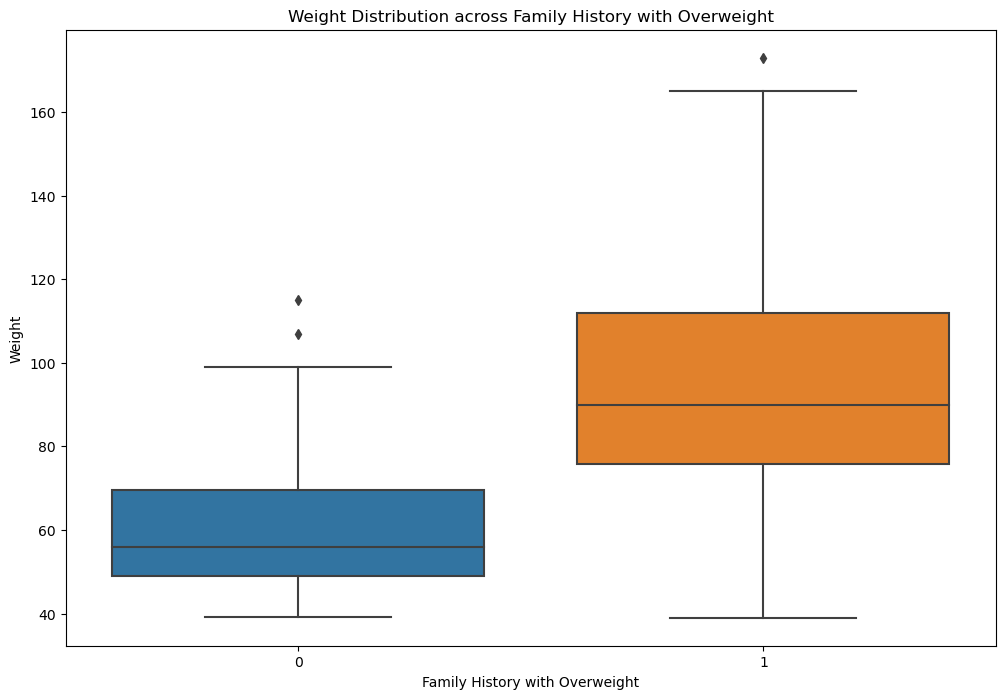

In [19]:

# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='family_history_with_overweight', y='Weight')
plt.title('Weight Distribution across Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Weight')
plt.show()

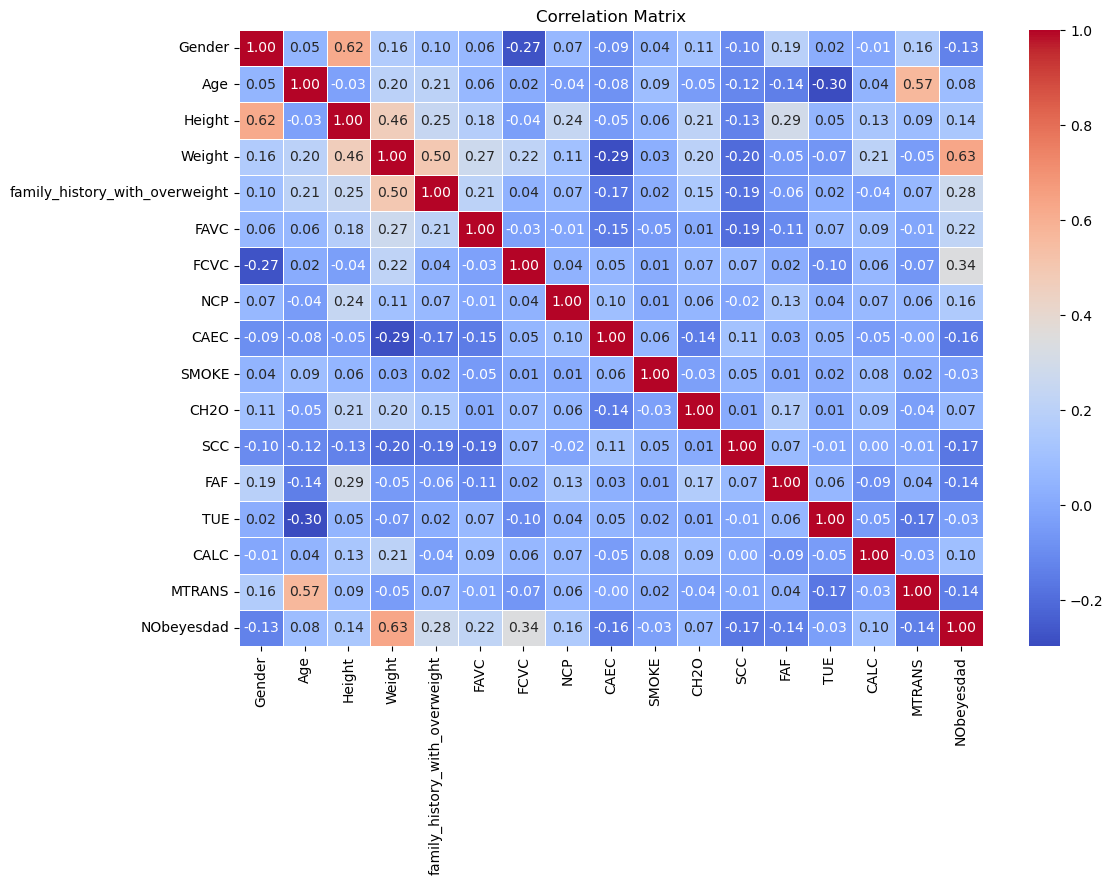

In [20]:
# Correlation Analysis

plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Train Test Split

In [21]:

# Splitting the data into features and target variable
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape,X_train.shape,X_test.shape)


(2111, 16) (1688, 16) (423, 16)


# Training the model

In [22]:
# Initializing classifiers
random_forest_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Training classifiers
random_forest_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

# Model Evaluation

In [23]:
# Predicting on the testing set
random_forest_preds = random_forest_classifier.predict(X_test)
svm_preds = svm_classifier.predict(X_test)

# Evaluating performance
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, random_forest_preds))
print("Precision:", precision_score(y_test, random_forest_preds, average='macro'))
print("Recall:", recall_score(y_test, random_forest_preds, average='macro'))
print("F1 Score:", f1_score(y_test, random_forest_preds, average='macro'))

print("\nSupport Vector Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Precision:", precision_score(y_test, svm_preds, average='macro'))
print("Recall:", recall_score(y_test, svm_preds, average='macro'))
print("F1 Score:", f1_score(y_test, svm_preds, average='macro'))


Random Forest Classifier:
Accuracy: 0.9574468085106383
Precision: 0.9566566892550549
Recall: 0.9562307558430234
F1 Score: 0.9563487664409323

Support Vector Classifier:
Accuracy: 0.5650118203309693
Precision: 0.586620561634829
Recall: 0.5747992478415169
F1 Score: 0.5488577126611788


# These findings suggest that, for this dataset, the Random Forest Classifier outperforms the Support Vector Classifier in terms of class prediction. The Random Forest Classifier exhibits strong performance across all evaluation measures, as seen by its excellent accuracy, precision, recall, and F1 score. However, the Support Vector Classifier performs noticeably worse on all metrics, indicating that it might not be the best choice for this specific dataset.